# Projeto - FASE 02

## Frases Manchete

### A cada ponto no Overall, o salário de um jogador sobe, em média, €8.181!

- Base: Resultado direto da análise de regressão linear e dos coeficientes obtidos no summary do modelo.
- Explicação: O modelo indicou que há uma relação direta e significativa entre o Overall Rating e o salário dos jogadores. Isso mostra que o desempenho geral tem um impacto relevante na remuneração dos atletas.

### Apenas 10% dos jogadores são atacantes no futebol internacional.

- Base: Resultado direto do cálculo da probabilidade incondicional.
- Explicação: A proporção de jogadores classificados como atacantes na base analisada é de aproximadamente 10%.

### Entre jogadores com mais de 1,90m de altura, 13,9% são goleiros.

- Base: Resultado direto do cálculo da probabilidade condicional.
- Explicação: Embora jogadores mais altos sejam naturalmente associados à posição de goleiro, o dado revela que a maioria dos atletas altos atuam em outras posições, reforçando que a altura é um fator, mas não é determinante exclusivo.

Neste projeto, realizamos uma análise estatística aplicada aos dados dos jogadores de futebol registrados na FIFA. O objetivo foi utilizar conceitos de probabilidade, estatística inferencial e análise de regressão para extrair informações relevantes e gerar insights a partir dos dados.

Inicialmente, foram calculadas probabilidades incondicionais e condicionais, permitindo entender, por exemplo, a proporção de jogadores por posição e a relação entre altura e posição de goleiro. Na sequência, construímos intervalos de confiança para variáveis numéricas como altura e peso, estimando os valores médios da população de jogadores com um nível de confiança de 95%.

Também foram realizados testes de hipóteses para avaliar se as médias populacionais de altura e peso poderiam ser consideradas iguais às respectivas médias amostrais arredondadas. Os testes trouxeram conclusões baseadas em evidências estatísticas, com uso do p-valor como critério de decisão.

Por fim, conduzimos uma análise de regressão linear simples para investigar se existe uma relação entre o desempenho dos jogadores (Overall Rating) e seus salários. O modelo mostrou uma relação positiva e significativa, indicando que a cada ponto no Overall, o salário de um jogador aumenta, em média, €8.181. Também foram realizados os diagnósticos do modelo, incluindo verificação da linearidade, homocedasticidade e normalidade dos resíduos. Esses testes indicaram que, apesar de uma relação positiva, a regressão linear não é o melhor fit para modelar os dados.

Como fechamento, elaboramos três manchetes de impacto que traduzem os principais achados de forma clara e acessível, demonstrando como a estatística pode gerar conhecimento a partir dos dados.

## Enunciado

O que você deve entregar: Um arquivo com a extensão “ipynb” contendo caixas de texto e de código intercaladas, contendo:  

1. Cálculo de probabilidades condicionais e incondicionais de pelo menos duas variáveis selecionadas pelo aluno 
2. Intervalos de confiança e sua interpretação para pelo menos duas variáveis selecionadas pelo aluno 
3. Testes de hipóteses e sua interpretação para pelo menos duas variáveis selecionadas pelo aluno. As hipóteses devem avaliar se a média populacional da referida variável pode ser considerada igual à média amostral arredondada para o inteiro. 
4. Análise de Regressão (simples ou múltipla) sobre variáveis que deverão ser escolhidas pelo autor do trabalho. O aluno deve interpretar os coeficientes OU realizar predições com os modelos selecionados, bem como indicar minimamente os diagnósticos realizados. 
5. Elaboração de três frases (manchetes) de efeito, associadas aos resultados observados. 

## Leitura dos Arquivos

Vamos ler o arquivo com a função `read_csv` da biblioteca Pandas e exibir as cinco primeiras linhas para conhecer o banco de dados

In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)


df = pd.read_csv('Anexo_Projeto_fifa_world_national_teams_versão_oficial.csv',encoding='latin1',sep=';')
df.head()


,id,name,full_name,overall_rating,value_euro,wage_euro,nationality,national_team,club_team,age,height_cm,weight_kgs,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),club_rating,Goleiro,Zagueiro,Meio,Atacante,crossing,finishing,heading_accuracy,short_passing,dribbling,jumping,strength,long_shots,aggression,GK_reflexes
0,158023,Messi,Lionel Andrés Messi Cuccittini,94,110500000,565000,Argentina,Argentina,FC Barcelona,31,170,72,5,4,4,86,0,0,0,1,86,95,70,92,97,68,66,94,48,8
1,153079,Aguero,Sergio Leonel Agüero del Castillo,89,64500000,300000,Argentina,Argentina,Manchester City,30,173,70,4,4,4,85,0,0,0,0,70,93,77,81,89,81,73,83,65,14
2,211110,Dybala,Paulo Bruno Exequiel Dybala,89,89000000,205000,Argentina,Argentina,Juventus,25,152,75,3,3,4,85,0,0,0,1,82,84,68,87,92,75,65,88,48,8
3,201399,Icardi,Mauro Emanuel Icardi Rivero,87,64500000,130000,Argentina,Argentina,Inter,26,155,75,3,4,3,82,0,0,0,1,46,91,91,73,77,94,76,70,56,9
4,226226,Lo Celso,Giovani Lo Celso,82,30000000,83000,Argentina,Argentina,Real Betis,22,175,70,1,3,4,80,0,0,0,0,75,77,59,82,84,64,69,76,65,14


## Probabilidades

### Probabilidade Incondicional

Probabilidade incondicional é a chance de ocorrência de um determinado evento, sem levar em conta qualquer outra condição ou informação adicional.
Representa simplesmente a frequência relativa do evento dentro do total de casos possíveis.

$ P(A) = \dfrac{\text{Número de casos favoráveis a A}}{\text{Número total de casos}} $ 

#### Probabilidade de um jogador ser da posição Atacante

A probabilidade de um jogador ser atacante é calculada como o número de jogadores cuja variável 'Atacante' é igual a 1, dividido pelo total de jogadores na base de dados.

In [9]:
p_atacante = (df['Atacante'] == 1).sum() / df.shape[0]
print(f'Probabilidade de selecionar um jogador atacante: {p_atacante:.2%}')

Probabilidade de selecionar um jogador atacante: 10.03%


Ao calcular a probabilidade incondicional, estamos considerando todos os jogadores da base, sem aplicar nenhum filtro ou condição. Isso responde a perguntas como:
- “Qual a chance de, ao escolher um jogador qualquer, ele ser atacante?

### Probabilidade Condicional

Probabilidade condicional é a chance de um evento ocorrer considerando que outro evento já aconteceu.

Ela responde perguntas como:
“Qual é a probabilidade de um jogador ser goleiro, dado que ele possui mais de 1,90m de altura?”

Ou seja, restringimos nosso universo apenas aos casos em que a condição já é verdadeira (ex.: jogadores com mais de 1,90m).

$ P(A|B) = \dfrac{P(A \cap B}{P(B)} $ 

#### Probabilidade de escolher um goleiro com altura maior que 1.90m

Ao calcular a probabilidade condicional, restringimos nossa análise apenas aos casos em que a condição se verifica (ex.: jogadores com mais de 1,90m). Assim, o denominador não é mais o total de jogadores, mas sim o total de jogadores que atendem à condição.

In [10]:
altura = df['height_cm'] > 190
goleiro = df['Goleiro'] == 1

goleiros_altos = (df[altura & goleiro])
jogadores_altos = (df[altura])

p_goleiros_altos = goleiros_altos.shape[0] / jogadores_altos.shape[0]
print(f'A probabilidade de um jogador com mais de 1,90m ser goleiro é de: {p_goleiros_altos:.2%}')

A probabilidade de um jogador com mais de 1,90m ser goleiro é de: 13.93%


## Intervalo de Confiança

O Intervalo de Confiança (IC) é uma ferramenta estatística que tem como objetivo estimar, a partir de uma amostra, o valor verdadeiro de um parâmetro da população — geralmente a média.

Na prática, quando coletamos dados, normalmente não temos acesso a todos os elementos da população. Por isso, usamos amostras e, consequentemente, precisamos lidar com a incerteza associada a essa coleta.

### Por que calcular um Intervalo de Confiança?


Ao calcular a média de uma variável em uma amostra (por exemplo, altura dos jogadores de futebol), estamos fazendo uma estimativa da média verdadeira da população.

O Intervalo de Confiança permite definir uma faixa de valores onde acreditamos que essa média verdadeira esteja, com um certo nível de confiança — geralmente 95%.

Se considerarmos que o dataset com 718 jogadores representa todos os jogadores do mundo, então a média de altura calculada no dataset é a média real da população.

Não há incerteza aqui.

Porém, se considerarmos que esses 718 jogadores são uma amostra de todos os jogadores do mundo, então faz todo sentido calcular o Intervalo de Confiança.



### Fórmula


$
IC = \bar{x} \pm t_{\alpha/2} \cdot \dfrac{s}{\sqrt{n}}
$

Onde:
- $\bar x$: Média amostral
- $t_{a/2}$: Valor crítico da distribuição
- $s$: Desvio padrão da amostra
- $n$: Tamanho da amostra

### Cálculo de Intervalos de Confiança com StatsModels

In [11]:
import statsmodels.stats.api as sms

altura = df['height_cm'].dropna()
ic_altura = sms.DescrStatsW(altura).tconfint_mean()
print(f'IC 95% para Altura: {ic_altura[0]:.2f} cm a {ic_altura[1]:.2f} cm')

peso = df['weight_kgs'].dropna()
ic_peso = sms.DescrStatsW(peso).tconfint_mean()
print(f'IC 95% para Peso: {ic_peso[0]:.2f} kg a {ic_peso[1]:.2f} kg')

IC 95% para Altura: 175.97 cm a 178.07 cm
IC 95% para Peso: 77.14 kg a 78.21 kg


### Interpretando o StatsModels

**Altura:** Estamos 95% confiantes de que a média de altura da população de jogadores profissionais do mundo está entre 175,97 cm e 178,07 cm, com base nos dados da nossa amostra.

**Peso:** Estamos 95% confiantes de que a média de peso da população de jogadores profissionais do mundo está entre 77,14kg e 78,21kg, com base nos dados da nossa amostra.

## Teste de Hipótese

O Teste de Hipótese é uma ferramenta estatística que usamos para tomar decisões sobre uma população, com base em uma amostra. Ele responde perguntas como:
- “A média da altura dos jogadores pode ser considerada igual a 180 cm?”
- “A média do overall rating pode ser considerada igual a 75?”

O **Teste de Hipóteses** é uma técnica estatística utilizada para verificar se uma afirmação sobre uma população pode ser aceita ou rejeitada, com base nos dados de uma amostra. O objetivo é tomar uma decisão sobre um parâmetro populacional (geralmente a média), a partir da evidência fornecida pelos dados.

### Hipótese Nula e Alternativa

O teste é composto por duas hipóteses:

- **Hipótese Nula (H₀)** → É a afirmação de que **não existe diferença** ou que a média populacional **é igual a um valor específico**.
- **Hipótese Alternativa (H₁)** → É a afirmação contrária, de que **existe diferença**, ou seja, a média populacional **não é igual** ao valor testado.

### Como tomar a decisão?

O teste gera dois valores principais:

- **t-statistic** → Estatística do teste (quanto a média amostral difere da média hipotética, em unidades de erro padrão).
- **p-valor** → Probabilidade de obtermos um resultado tão extremo quanto o observado, assumindo que a hipótese nula é verdadeira.

Após obter o valor-p, basta usar a regra abaixo:

- Se **p-valor < 0.05** → **Rejeitamos H₀**. Há evidências de que a média é diferente do valor testado.
- Se **p-valor ≥ 0.05** → **Não rejeitamos H₀**. Não há evidências suficientes para afirmar que a média é diferente.

_Usamos 5% como valor padrão de mercado_

### Teste de Hipótese para a Altura

Vamos testar se a média populacional de altura pode ser considerada igual a média amostral arredondada para o inteiro.

**Levantamento de Hipóteses**
- H0: média de altura = $\mu_0$
- H1: média de altura $\neq \mu_0$ 

**Aplicar o Teste T:** Vamos aplicar o Teste T à nossa amostra e encontrar o P-Valor

**Comparar com $\alpha = 5\%$:** Vamos comparar com o valor padrão de mercado para definir se rejeitamos ou não H0

In [18]:
from scipy.stats import ttest_1samp

altura = df['height_cm'].dropna()

media_altura = round(altura.mean())
print(f'Média de altura da amostra, arredondada para o inteiro: {media_altura} cm')
print(f'Média real da altura da amostra: {df['height_cm'].mean():.2f} cm')


t_stat, p_value = ttest_1samp(altura, popmean=media_altura)

print(f'P-valor: {p_value*100:.4f}%')

if p_value < 0.05:
    conclusao = f'Rejeitamos H0: Como o P-valor é baixo, há fortes evidências de que a média populacional é diferente de {media_altura}.'
else:
    conclusao = f'Não rejeitamos H0: Como o P-valor é alto, não há evidências suficientes para dizer que a média populacional é diferente de {media_altura} cm.'

print(conclusao)

Média de altura da amostra, arredondada para o inteiro: 177 cm
Média real da altura da amostra: 177.02 cm
P-valor: 96.4665%
Não rejeitamos H0: Como o P-valor é alto, não há evidências suficientes para dizer que a média populacional é diferente de 177 cm.


### Teste de Hipótese para o Peso

Vamos testar se a média de peso dos jogadores pode ser considerada igual a média amostral arredondada para o inteiro.

**Levantamento de Hipóteses**
- H0: peso = $\mu_0$
- H1: peso $\neq \mu_0$ 

**Aplicar o Teste T:** Vamos aplicar o Teste T à nossa amostra e encontrar o P-Valor

**Comparar com $\alpha = 5\%$:** Vamos comparar com o valor padrão de mercado para definir se rejeitamos ou não H0

In [19]:
from scipy.stats import ttest_1samp

peso = df['weight_kgs'].dropna()

media_peso = round(peso.mean())
print(f'Média de altura da amostra, arredondada para o inteiro: {media_peso} kg')
print(f'Média real do peso da amostra: {df['weight_kgs'].mean():.2f} kg')

t_stat, p_value = ttest_1samp(peso, popmean=media_peso)

print(f'P-valor: {p_value*100:.4f}%')

if p_value < 0.05:
    conclusao = f'Rejeitamos H0: Como o P-valor é baixo, há fortes evidências de que a média é diferente de {media_peso} kg.'
else:
    conclusao = f'Não rejeitamos H0: Como o P-valor é alto, não há evidências suficientes para dizer que a média é diferente de {media_peso} kg.'

print(conclusao)

Média de altura da amostra, arredondada para o inteiro: 78 kg
Média real do peso da amostra: 77.67 kg
P-valor: 23.1904%
Não rejeitamos H0: Como o P-valor é alto, não há evidências suficientes para dizer que a média é diferente de 78 kg.


## Regressão Linear

A Análise de Regressão Linear é uma técnica estatística utilizada para investigar e quantificar a relação existente entre uma variável dependente (ou resposta) e uma ou mais variáveis independentes (ou explicativas).

O principal objetivo da regressão linear é criar um modelo que permita:
- Descrever a relação entre as variáveis.
- Avaliar a intensidade e a direção dessa relação.
- Realizar predições da variável dependente com base nos valores das variáveis independentes.

###  Modelo de Regressão Linear Simples

A regressão linear simples envolve duas variáveis quantitativas:
- **Variável dependente (Y)** → aquela que se deseja explicar ou prever.
- **Variável independente (X)** → aquela que se acredita ter impacto sobre Y.

A equação do modelo é expressa como:

$
Y = \beta_0 + \beta_1 \cdot X + \epsilon
$

Onde: 
- $\beta_0$: Intercepto — valor esperado de Y quando X é zero.
- $\beta_1$: Coeficiente angular — representa a variação média de Y associada a uma variação de uma unidade em X.
- $\epsilon$: Termo de erro aleatório, que representa os efeitos de outras variáveis não incluídas no modelo e outras fontes de aleatoriedade.

### Suposições da Regressão Linear

Para que os resultados da regressão linear sejam estatisticamente válidos e confiáveis, é necessário que algumas suposições sejam atendidas:

- **Linearidade:** A relação entre as variáveis independentes e a variável dependente é linear.
- **Independência:** As observações são independentes entre si.
- **Homoscedasticidade:** A variância dos resíduos (erros) é constante para todos os níveis das variáveis independentes.
- **Normalidade dos erros:** Os resíduos seguem uma distribuição normal.
- **Ausência de multicolinearidade (na regressão múltipla):** As variáveis independentes não são altamente correlacionadas entre si.

### Avaliação do Modelo

- **R² (Coeficiente de determinação):** Mede a proporção da variabilidade da variável dependente que é explicada pelo modelo. Varia entre 0 e 1, quanto mais próximo de 1, melhor o ajuste.
- **P-valor dos coeficientes:** Avalia se os coeficientes são estatisticamente diferentes de zero. Se p < 0.05, o coeficiente é considerado significativo.
- **F-statistic:** Avalia se o modelo, como um todo, é estatisticamente significativo.

### Aplicação Prática

Neste estudo, iremos investigar se existe uma relação estatisticamente significativa entre o Overall Rating (desempenho geral dos jogadores) e o Salário dos atletas.

Para isso, realizaremos as seguintes etapas:
- Organização dos dados: Selecionar as variáveis relevantes e tratar possíveis inconsistências.
- Ajuste do modelo: Aplicar a regressão linear simples, onde o salário será a variável dependente e o Overall Rating a variável explicativa.
- Diagnóstico do modelo: Verificar se as principais suposições da regressão linear estão atendidas, garantindo que os resultados sejam estatisticamente válidos.
- Interpretação dos resultados: Analisar os coeficientes, o ajuste do modelo (R²) e a significância estatística.

Essa abordagem nos permitirá entender se o desempenho dos jogadores, representado pelo Overall Rating, é um fator capaz de explicar a variação dos salários dentro do conjunto de dados analisado.

In [26]:
import statsmodels.api as sm

dados = df[['overall_rating', 'wage_euro']].dropna()
dados = dados[dados['wage_euro'] > 0]

x = dados['overall_rating']
y = dados['wage_euro']

x_const = sm.add_constant(x)

modelo = sm.OLS(y, x_const).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              wage_euro   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     948.8
Date:                Mon, 23 Jun 2025   Prob (F-statistic):          2.54e-133
Time:                        12:30:19   Log-Likelihood:                -8674.8
No. Observations:                 718   AIC:                         1.735e+04
Df Residuals:                     716   BIC:                         1.736e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -5.76e+05   2.04e+04    -28.

#### Linearidade

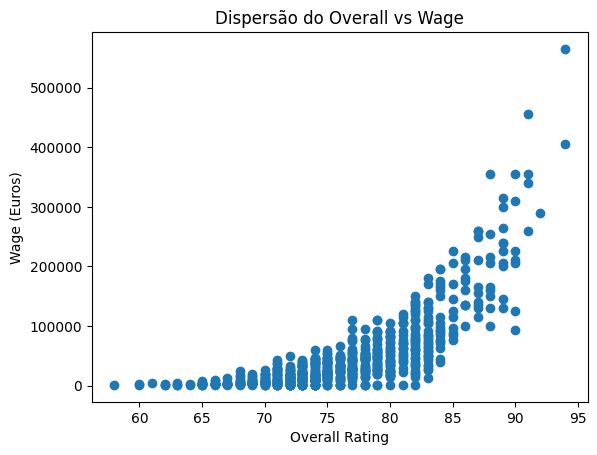

In [25]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('Overall Rating')
plt.ylabel('Wage (Euros)')
plt.title('Dispersão do Overall vs Wage')
plt.show()


Observando o gráfico de dispersão entre Overall Rating e Salário, é possível perceber que existe uma tendência de aumento do salário à medida que o Overall Rating cresce, indicando uma relação positiva entre as variáveis.

No entanto, também é visível que essa relação não segue exatamente um padrão linear. Existe uma concentração de jogadores com salários baixos em todos os níveis de Overall, e, a partir de valores mais altos de Overall (acima de 85, aproximadamente), observa-se um crescimento mais acentuado dos salários.

Isso sugere que a relação entre Overall e Salário pode não ser totalmente linear, e que modelos não-lineares (como uma regressão exponencial, polinomial ou logarítmica) poderiam potencialmente capturar melhor esse comportamento.

Apesar disso, seguiremos com o modelo linear, por fins do trabalho.

#### Independência dos erros

In [27]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              wage_euro   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     948.8
Date:                Mon, 23 Jun 2025   Prob (F-statistic):          2.54e-133
Time:                        12:31:45   Log-Likelihood:                -8674.8
No. Observations:                 718   AIC:                         1.735e+04
Df Residuals:                     716   BIC:                         1.736e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -5.76e+05   2.04e+04    -28.

O coeficiente de Durbin-Watson sugere que há uma correlação positiva entre as variáveis. Como não estamos trabalhando com uma série temporal, esse coeficiente não é tão relevante.

#### Homocedasticidade

In [28]:
from statsmodels.stats.diagnostic import het_breuschpagan

residuals = modelo.resid
bp_test = het_breuschpagan(residuals, x_const)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': np.float64(68.08523969777573), 'LM-Test p-value': np.float64(1.5657836705065854e-16), 'F-Statistic': np.float64(75.00834663446959), 'F-Test p-value': np.float64(3.0925304053511274e-17)}


Rejeitamos a hipótese nula (H₀) de homocedasticidade. Isso significa que os resíduos não são homocedásticos, ou seja, o modelo apresenta heterocedasticidade.

#### Normalidade dos erros

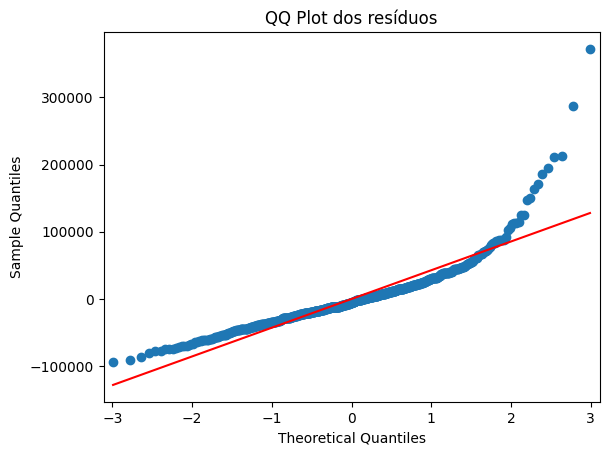

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s')
plt.title('QQ Plot dos resíduos')
plt.show()


In [30]:
from scipy.stats import shapiro

shapiro_test = shapiro(residuals)
print(f'Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}')

if shapiro_test.pvalue > 0.05:
    print('Resíduos seguem distribuição normal.')
else:
    print('Resíduos NÃO seguem distribuição normal.')


Statistic=0.8508, p-value=0.0000
Resíduos NÃO seguem distribuição normal.


A análise da normalidade dos resíduos, por meio do QQ-Plot e do teste de Shapiro-Wilk, indica que os resíduos não seguem uma distribuição normal. O QQ-Plot apresenta desvios nas caudas, e o p-valor do teste de Shapiro-Wilk foi inferior a 0.05 (p ≈ 0.000), o que leva à rejeição da hipótese de normalidade.

#### Testando Previsões

Utilizando o modelo de regressão ajustado, foi possível realizar predições de salário com base no Overall Rating dos jogadores. Por exemplo, para um jogador com Overall igual a 85, o modelo prevê um salário de aproximadamente €119,423.27.

Essa previsão é baseada na relação média observada no conjunto de dados analisado, considerando a variação dos salários em função do Overall Rating. É importante destacar que, como todo modelo estatístico, essa predição representa uma expectativa média, podendo diferir dos salários reais em função de outros fatores não considerados no modelo (como posição, clube, mercado, idade, etc.).

In [31]:
# Definindo o Overall do jogador
overall_jogador = 85

# Usando o modelo para prever
salario_previsto = modelo.predict([ [1, overall_jogador] ])  # O 1 é para o intercepto

print(f'Salário previsto para um jogador com Overall {overall_jogador}: €{salario_previsto[0]:,.2f}')


Salário previsto para um jogador com Overall 85: €119,423.27
